In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255.0
x_test = x_test.reshape((-1,28,28,1)).astype('float32') / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
import numpy as np
def to_rgb(x):
    x_rgb = np.zeros((x.shape[0], 28, 28, 3))
    for i in range(3):
        x_rgb[..., i] = x[..., 0]
    return x_rgb
x_train = to_rgb(x_train)
x_test = to_rgb(x_test)

In [4]:
model = keras.Sequential(
    [
     keras.Input(shape=(28,28,3)),
     layers.Conv2D(16, 3, activation='relu'),
     layers.MaxPooling2D(),
     layers.Flatten(),
     layers.Dense(10)
    ]
)

In [5]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [6]:
model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1931 - accuracy: 0.9447 - val_loss: 0.0726 - val_accuracy: 0.9775
Epoch 2/2
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0762 - accuracy: 0.9773 - val_loss: 0.0673 - val_accuracy: 0.9781


In [ ]:
!pip install lime

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

In [9]:
y_pred_train = model.predict(x_train)
bad_predictions = (y_pred_train.argmax(axis=1) != y_train)
print('Bad predictions:', sum(bad_predictions))

Bad predictions: 1000


- `get_image_and_mask` 를 실행하면, 이미지 분할이 완료된 원본 이미지와 분할된 영역(masking area)을 반환한다

  0%|          | 0/1000 [00:00<?, ?it/s]

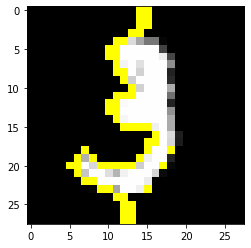

In [10]:
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(x_train[10], model.predict)
plt.imshow(x_train[10])
temp, mask = explanation.get_image_and_mask(model.predict(x_train[10].reshape((1,28,28,3))).argmax(axis=1)[0],
                                            positive_only=True,
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [14]:
from skimage.color import gray2rgb, rgb2gray, label2rgb # 

Text(0.5, 1.0, 'Positive/Negative Regions for 3')

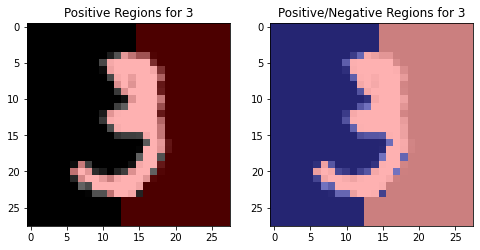

In [15]:
temp, mask = explanation.get_image_and_mask(model.predict(x_train[10].reshape((1,28,28,3))).argmax(axis=1)[0],
                                            positive_only=True,
                                            num_features=10,
                                            hide_rest=False,
                                            min_weight=0.01)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(label2rgb(mask, temp, bg_label=0), interpolation='nearest')
ax1.set_title('Positive Regions for {}'.format(model.predict(x_train[10].reshape((1,28,28,3))).argmax(axis=1)[0]))
temp, mask = explanation.get_image_and_mask(model.predict(x_train[10].reshape((1,28,28,3))).argmax(axis=1)[0],
                                            positive_only=False,
                                            num_features=10,
                                            hide_rest=False,
                                            min_weight=0.01)

ax2.imshow(label2rgb(3 - mask, temp, bg_label=0), interpolation='nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(model.predict(x_train[10].reshape((1,28,28,3))).argmax(axis=1)[0]))